In [1]:
import os
import pandas as pd

In [2]:
#upload the training data
from google.colab import files
uploaded = files.upload()

Saving trainclean.csv to trainclean.csv


In [3]:
import io
df = pd.read_csv(io.BytesIO(uploaded['trainclean.csv']))
raw_df=df.copy()

In [4]:
train_id = df['id']

In [5]:
df.drop('id', inplace=True, axis=1)

In [ ]:
df.head()

In [ ]:
df.info()

In [ ]:
df.describe

In [ ]:
df.dtypes

In [10]:
from sklearn.utils import resample
df_majority = df[(df['label']==0)] 
df_minority = df[(df['label']==1)]
#print(df_majority.count)

df_minority_upsampled = resample(df_minority,replace=True,n_samples= 23562, random_state=42)

df = pd.concat([df_minority_upsampled, df_majority])  # trying to balance the dataset


In [11]:
y= df['label']
X= df.drop(columns=['label'])


In [12]:

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test =train_test_split(X, y, test_size=0.20, random_state=1)

X_train, X_train_Val, y_train, y_train_val =train_test_split(X_train, y_train, test_size=0.25, random_state=1) 


In [ ]:
X_train.shape

(16992, 28)

In [ ]:

#X_train_Val= X[0:22677]    # contains training and validation dataset
#y_train_val= y[0:22677]                  

#X_test= X[22677:28322]      # X_test & y_test from original data
#y_test= y[22677:28322]


In [ ]:
X_train.shape

(5099, 28)

In [ ]:
y_test.shape

(10000,)

In [ ]:
!pip install scikit-optimize 

In [ ]:
import skopt
from skopt import BayesSearchCV
from skopt.space import Real, Categorical, Integer

<font color="Blue"> **implementation**

<font color="Blue"> **Decision Tree**

In [ ]:
#hyper parameter tuning
from sklearn.model_selection import RandomizedSearchCV
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import KFold

k = 10
kf = KFold(n_splits=k, shuffle= True, random_state = 42)

param_grid = {'max_depth' :Integer(1,30) ,
              'criterion' :('gini', 'entropy'),
              'max_features' : ('auto', 'sqrt', 'log2'),
              'min_samples_split' : Integer(2,40) 
             }
Tree_model  = BayesSearchCV(DecisionTreeClassifier(), param_grid, cv = kf, n_iter=32)
 
 
Tree_model.fit(X_train_Val, y_train_val)
Tree_model.best_estimator_

In [13]:
from sklearn import datasets
from sklearn.model_selection import KFold
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_curve 
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
from sklearn.metrics import precision_score
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
import statistics

k = 10
kf = KFold(n_splits=k, shuffle= True, random_state=42)

train_acc_tree=[]
val_acc_tree=[]
precision_tree=[]
recall_tree=[]
f1_tree=[]
AOC_tree=[]
ROC_tree_metrix=[]
fpr_tree_metrix=[]
tpr_tree_metrix=[]

Tree_model= DecisionTreeClassifier(criterion='entropy', max_depth=9, max_features='sqrt', min_samples_split=24) #criterion='entropy', max_depth=5, max_features='auto', min_samples_split=6
for train_index , val_index in kf.split(X_train_Val):

    X_train, X_val= X_train_Val.iloc[train_index], X_train_Val.iloc[val_index]
    y_train , y_val = y_train_val.iloc[train_index] , y_train_val.iloc[val_index]
    Tree_model.fit(X_train_Val,y_train_val)

    # Train accuracy
    Tree_train_pred_values=Tree_model.predict(X_train)
    train_acc_of_tree= accuracy_score(y_train,Tree_train_pred_values)
    train_acc_tree.append(train_acc_of_tree)

    # Validation accuracy
    Tree_pred_values = Tree_model.predict(X_test)
    accuracy_of_tree = accuracy_score(y_test,Tree_pred_values)
    val_acc_tree.append(accuracy_of_tree)
    
  
    #Precision
    precision_tree.append (precision_score(y_test,Tree_pred_values))

    # Recall
    recall_tree.append(recall_score(y_test,Tree_pred_values))

    # F1 Score
    f1_tree.append(f1_score(y_test,Tree_pred_values))

    # AOC Score
    AOC_tree.append(roc_auc_score(y_test, Tree_pred_values))
    
    # ROC
    tree_roc_y_score= Tree_model.predict_proba(X_test)[:,1]
    fpr_tree, tpr_tree, threshold1= roc_curve(y_test,tree_roc_y_score)
    fpr_tree_metrix.append(fpr_tree)
    tpr_tree_metrix.append(tpr_tree)

In [14]:
# Evaluation of Decision Tree:

print("Evaluation of Decision Tree:-------------------------------------------------")

avg_training_acc_score_of_tree = sum(train_acc_tree)/k
print("Trainning accuracy: {} stadard deviation: {}".format(avg_training_acc_score_of_tree,statistics.stdev(train_acc_tree)))

avg_acc_score_of_tree = sum(val_acc_tree)/k
print("Test accuracy: {} stadard deviation: {}".format(avg_acc_score_of_tree,statistics.stdev(val_acc_tree)))

avg_precision= sum(precision_tree)/k
print("precision: {} stadard deviation: {}".format(avg_precision,statistics.stdev(precision_tree)))

avg_recall_tree= sum(recall_tree)/k
print("recall: {} stadard deviation: {}".format(avg_recall_tree,statistics.stdev(recall_tree)))

avg_f1_tree=sum(f1_tree)/k
print("f1 score: {} stadard deviation: {}".format(avg_f1_tree,statistics.stdev(f1_tree)))

avg_aoc_tree= sum(AOC_tree)/k
print("AOC score: {} stadard deviation: {}".format(avg_aoc_tree,statistics.stdev(AOC_tree)))

Evaluation of Decision Tree:-------------------------------------------------
Trainning accuracy: 0.8040554721382236 stadard deviation: 0.003619751231092374
Test accuracy: 0.7775915119363395 stadard deviation: 0.0014145004310330855
precision: 0.8038422396945742 stadard deviation: 0.013487090069926957
recall: 0.7353627492575308 stadard deviation: 0.019784337427261576
f1 score: 0.7677519351431732 stadard deviation: 0.005090368992137436
AOC score: 0.7776049577321404 stadard deviation: 0.0014143950320394678


[]

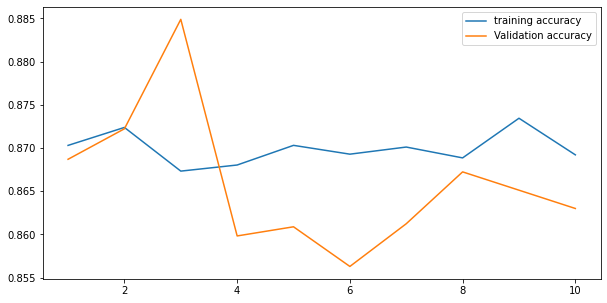

In [ ]:
#potting training vs validation curve

import matplotlib.pyplot as plt

labels=[1,2,3,4,5,6,7,8,9,10]

fig = plt.figure(figsize=(10,5))
plt.plot(labels, train_acc_tree)
plt.plot(labels, val_acc_tree)
plt.legend(["training accuracy", "Validation accuracy"])
plt.plot()

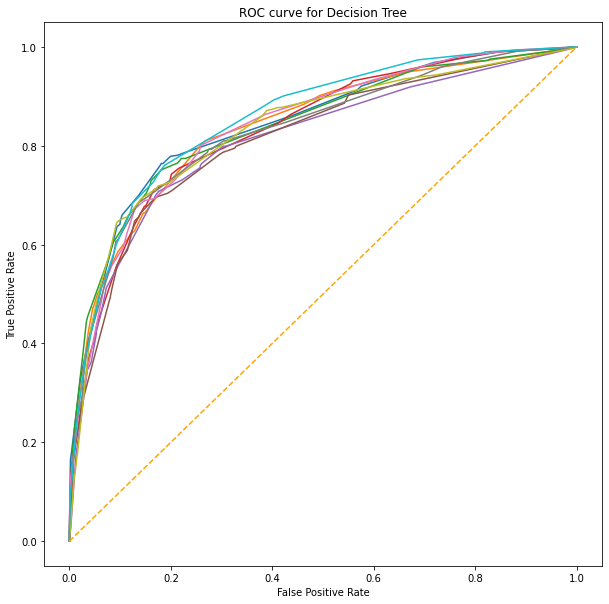

In [ ]:
# Decision Tree ROC Curve:
#---------------------------------
fig = plt.figure(figsize=(10,10))
for i in range(k):
    plt.title('ROC curve for Decision Tree')
    plt.plot(fpr_tree_metrix[i],tpr_tree_metrix[i])
    plt.ylabel('True Positive Rate')
    plt.xlabel('False Positive Rate')

plt.plot([0,1], [0,1], color='orange', linestyle='--')

<font color="Blue"> **Logistic Regression**

In [ ]:
#Hyper parameter tuning 
#from pandas.core.common import random_state
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import KFold
from sklearn.linear_model import LogisticRegression

k= 10
kf = KFold(n_splits= k, shuffle= True, random_state = 42) # shuffle must be true 

#for hyper parameter tuning 
param_grid = [    
    {
    
    'solver'  : Categorical(['lbfgs','newton-cg','liblinear','sag','saga']),
    'C'       : Real(1e-3, 1e+3, prior='log-uniform')#The C parameter controls the penality strength
     #log-uniform: understand as search over p = exp(x) by varying x

    }
]

logissticModel = BayesSearchCV(LogisticRegression(), param_grid ,cv=kf, n_jobs=-1, n_iter=32)


best_logissticModel = logissticModel.fit(X_train_Val, y_train_val)
best_logissticModel.best_estimator_ 

LogisticRegression(C=0.07718142997698693, solver='newton-cg')

In [15]:
from sklearn.linear_model import LogisticRegression
from sklearn import datasets
from sklearn.model_selection import KFold
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_curve 
from sklearn.metrics import accuracy_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
from sklearn.metrics import precision_score
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
import statistics

k= 10
kf = KFold(n_splits= k, shuffle=True, random_state=42) # shuffle must be true 

train_acc_log=[]
val_acc_log=[]
precision_log=[]
recall_log=[]
f1_log=[]
AOC_log=[]

ROC_log_metrix=[]
fpr_log_metrix=[]
tpr_log_metrix=[]

logissticModel = LogisticRegression( C=0.07718142997698693, solver='newton-cg') #C=1.5, max_iter=1, penalty='l1', solver='liblinear'   C=0.1, max_iter=10, solver='newton-cg'
for train_index , val_index in kf.split(X_train_Val):

  X_train, X_val= X_train_Val.iloc[train_index], X_train_Val.iloc[val_index]
  y_train, y_val= y_train_val.iloc[train_index], y_train_val.iloc[val_index]

  #fit the model:
  logissticModel.fit(X_train,y_train)

  #find the training accuracy:
  log_train_pred_values=logissticModel.predict(X_train)
  train_acc_of_log= accuracy_score(y_train,log_train_pred_values)
  train_acc_log.append(train_acc_of_log)

  #find validation accuray:
  log_pred_values = logissticModel.predict(X_test)
  test_accuracy_of_log = accuracy_score(y_test,log_pred_values)
  val_acc_log.append(test_accuracy_of_log)

  #Precision:
  precision_log.append (precision_score(y_test,log_pred_values))

  #Recall:
  recall_log.append(recall_score(y_test,log_pred_values))

  #F1 Score:
  f1_log.append(f1_score(y_test,log_pred_values))

  #AOC Score:
  AOC_log.append(roc_auc_score(y_test,log_pred_values))

  #ROC:
  log_roc_y_score= logissticModel.predict_proba(X_test)[:,1]
  fpr_log, tpr_log, threshold2= roc_curve(y_test,log_roc_y_score)
  fpr_log_metrix.append(fpr_log)
  tpr_log_metrix.append(tpr_log)

In [16]:
# Evaluation of Logistic Regression:
print("Evaluation of Logistic Regression--------------------------")
avg_train_acc_log= sum(train_acc_log)/k
print("Trainning accuracy: {} stadard deviation: {}".format(avg_train_acc_log,statistics.stdev(train_acc_log)))

avg_val_acc_score_of_log = sum(val_acc_log)/k
print("Test accuracy: {} stadard deviation: {}".format(avg_val_acc_score_of_log,statistics.stdev(val_acc_log)))

avg_precision_log= sum(precision_log)/k
print("precision: {} stadard deviation: {}".format(avg_precision_log,statistics.stdev(precision_log)))

avg_recall_log= sum(recall_log)/k
print("recall: {} stadard deviation: {}".format(avg_recall_log,statistics.stdev(recall_log)))

avg_f1_log= sum(f1_log)/k
print("f1 score: {} stadard deviation: {}".format(avg_f1_log,statistics.stdev(f1_log)))

avg_aoc_log= sum(AOC_log)/k
print("AOC score: {} stadard deviation: {}".format(avg_aoc_log,statistics.stdev(AOC_log)))

Evaluation of Logistic Regression--------------------------
Trainning accuracy: 0.7869024329641849 stadard deviation: 0.0010948720146734907
Test accuracy: 0.7834694960212202 stadard deviation: 0.0009579151627787148
precision: 0.8083426499091819 stadard deviation: 0.001085662899268422
recall: 0.7433177768349597 stadard deviation: 0.0016031373283488506
f1 score: 0.7744668209144745 stadard deviation: 0.0010917567520282708
AOC score: 0.7834822804786133 stadard deviation: 0.0009578237087565028


[]

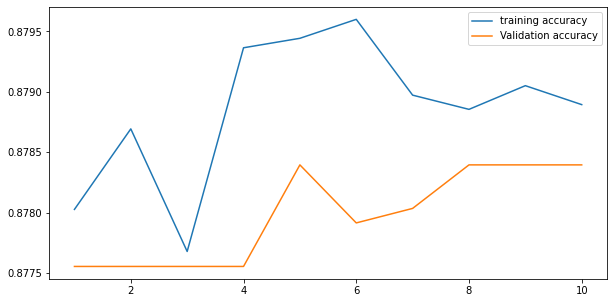

In [ ]:
#potting training vs validation curve

import matplotlib.pyplot as plt

labels=[1,2,3,4,5,6,7,8,9,10]

fig = plt.figure(figsize=(10,5))
plt.plot(labels, train_acc_log)
plt.plot(labels, val_acc_log)
plt.legend(["training accuracy", "Validation accuracy"])
plt.plot()

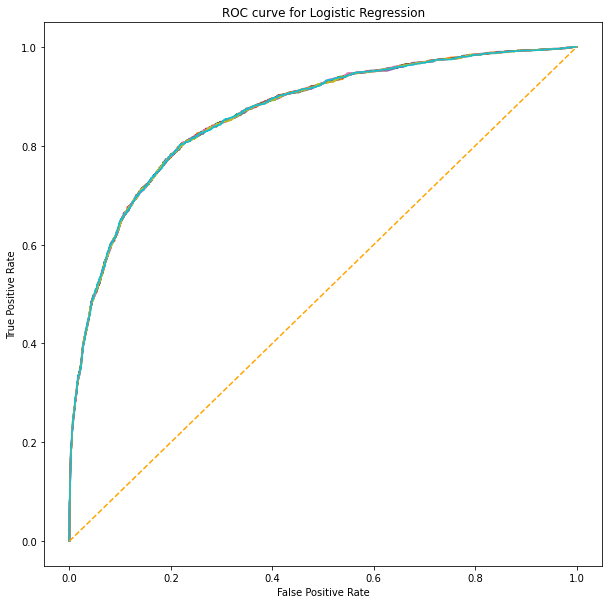

In [ ]:
# logistic regression ROC Curve:
#---------------------------------
fig = plt.figure(figsize=(10,10))
for i in range(k):
    plt.title('ROC curve for Logistic Regression')
    plt.plot(fpr_log_metrix[i],tpr_log_metrix[i])
    plt.ylabel('True Positive Rate')
    plt.xlabel('False Positive Rate')

plt.plot([0,1], [0,1], color='orange', linestyle='--')

<font color="Blue"> **KNN**

In [ ]:
#hyper parameter tuning
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import KFold
from sklearn.model_selection import RandomizedSearchCV

k= 10
kf = KFold(n_splits= k, shuffle=True, random_state=42)

grid_params = { 'n_neighbors' : Integer(1,30), #find difault threshold value
               'weights' : (['uniform','distance']),
               'metric' : (['minkowski','euclidean','manhattan'])
              }
gs = BayesSearchCV(KNeighborsClassifier(), grid_params, verbose = 1, cv=kf, n_jobs = -1,n_iter=32) #metric='manhattan', n_neighbors=15, weights='distance'

gs.fit(X_train_Val, y_train_val)
gs.best_estimator_ 


Fitting 10 folds for each of 1 candidates, totalling 10 fits


/usr/local/lib/python3.7/dist-packages/joblib/externals/loky/process_executor.py:705: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  "timeout or by a memory leak.", UserWarning


Fitting 10 folds for each of 1 candidates, totalling 10 fits
Fitting 10 folds for each of 1 candidates, totalling 10 fits
Fitting 10 folds for each of 1 candidates, totalling 10 fits
Fitting 10 folds for each of 1 candidates, totalling 10 fits
Fitting 10 folds for each of 1 candidates, totalling 10 fits
Fitting 10 folds for each of 1 candidates, totalling 10 fits
Fitting 10 folds for each of 1 candidates, totalling 10 fits
Fitting 10 folds for each of 1 candidates, totalling 10 fits
Fitting 10 folds for each of 1 candidates, totalling 10 fits
Fitting 10 folds for each of 1 candidates, totalling 10 fits
Fitting 10 folds for each of 1 candidates, totalling 10 fits
Fitting 10 folds for each of 1 candidates, totalling 10 fits
Fitting 10 folds for each of 1 candidates, totalling 10 fits
Fitting 10 folds for each of 1 candidates, totalling 10 fits
Fitting 10 folds for each of 1 candidates, totalling 10 fits
Fitting 10 folds for each of 1 candidates, totalling 10 fits
Fitting 10 folds for eac

/usr/local/lib/python3.7/dist-packages/skopt/optimizer/optimizer.py:449: UserWarning: The objective has been evaluated at this point before.
  warnings.warn("The objective has been evaluated "


Fitting 10 folds for each of 1 candidates, totalling 10 fits


/usr/local/lib/python3.7/dist-packages/skopt/optimizer/optimizer.py:449: UserWarning: The objective has been evaluated at this point before.
  warnings.warn("The objective has been evaluated "


Fitting 10 folds for each of 1 candidates, totalling 10 fits
Fitting 10 folds for each of 1 candidates, totalling 10 fits
Fitting 10 folds for each of 1 candidates, totalling 10 fits


KNeighborsClassifier(metric='manhattan', n_neighbors=22)

In [17]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn import datasets
from sklearn.model_selection import KFold
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_curve 
from sklearn.metrics import accuracy_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
from sklearn.metrics import precision_score
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
import statistics


k= 10
kf = KFold(n_splits= k, shuffle=True)

train_acc_knn=[]
val_acc_knn=[]
precision_knn=[]
recall_knn=[]
f1_knn=[]
AOC_knn=[]
ROC_knn_metrix=[]
fpr_knn_metrix=[]
tpr_knn_metrix=[]

KNNmodel = KNeighborsClassifier(metric='manhattan', n_neighbors=22) # metric='manhattan', n_neighbors=12, weights='distance'
for train_index , val_index in kf.split(X_train_Val):

        X_train, X_val= X_train_Val.iloc[train_index], X_train_Val.iloc[val_index]
        y_train , y_val =  y_train_val.iloc[train_index] ,  y_train_val.iloc[val_index]
        KNNmodel.fit(X_train,y_train)

        # Train accuracy
        knn_train_pred_values=KNNmodel.predict(X_train)
        train_acc_of_knn= accuracy_score(y_train,knn_train_pred_values)
        train_acc_knn.append(train_acc_of_knn)

        # Validation accuracy
        knn_pred_values = KNNmodel.predict(X_val)
        val_accuracy_of_knn = accuracy_score(y_val,knn_pred_values)
        val_acc_knn.append(val_accuracy_of_knn)

        # Precision
        precision_knn.append (precision_score(y_val,knn_pred_values))

        # Recall
        recall_knn.append(recall_score(y_val,knn_pred_values))

        # F1 Score
        f1_knn.append(f1_score(y_val,knn_pred_values))

        # AOC Score
        AOC_knn.append(roc_auc_score(y_val,knn_pred_values))

        # ROC
        knn_roc_y_score= KNNmodel.predict_proba(X_val)[:,1]
        fpr_knn, tpr_knn, threshold2= roc_curve(y_val,knn_roc_y_score)
        fpr_knn_metrix.append(fpr_knn)
        tpr_knn_metrix.append(tpr_knn)


In [18]:
# Evaluation of KNN

print("Evaluation of KNN --------------------------------: ")
avg_train_acc_knn= sum(train_acc_knn)/k
print("Train accuracy: {} stadard deviation: {}".format(avg_train_acc_knn,statistics.stdev(train_acc_knn)))

avg_val_acc_score_of_knn = sum(val_acc_knn)/k
print("Test accuracy: {} stadard deviation: {}".format(avg_val_acc_score_of_knn,statistics.stdev(val_acc_knn)))

avg_precision_knn= sum(precision_knn)/k
print("precision: {} stadard deviation: {}".format(avg_precision_knn,statistics.stdev(precision_knn)))

avg_recall_knn= sum(recall_knn)/k
print("recall: {} stadard deviation: {}".format(avg_recall_knn,statistics.stdev(recall_knn)))

avg_f1_knn= sum(f1_knn)/k
print("f1 score: {} stadard deviation: {}".format(avg_f1_knn,statistics.stdev(f1_knn)))

avg_aoc_knn= sum(AOC_knn)/k
print("AOC score: {} stadard deviation: {}".format(avg_aoc_knn,statistics.stdev(AOC_knn)))

Evaluation of KNN --------------------------------: 
Train accuracy: 0.7924314556961128 stadard deviation: 0.001804256748463376
Test accuracy: 0.7790986439357609 stadard deviation: 0.013016743173340296
precision: 0.8306819958041547 stadard deviation: 0.02072421487087477
recall: 0.7054117789481993 stadard deviation: 0.016188910363432448
f1 score: 0.7628457595397992 stadard deviation: 0.015812011862068452
AOC score: 0.7796781513406766 stadard deviation: 0.013483359198585594


[]

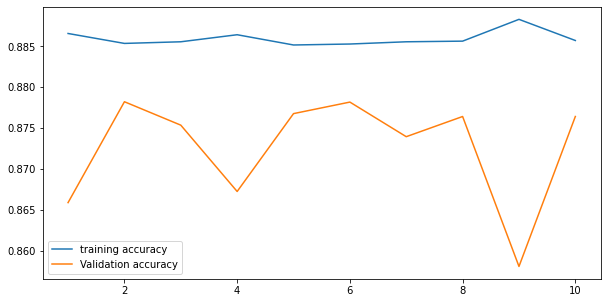

In [ ]:
#potting training vs validation curve

import matplotlib.pyplot as plt

labels=[1,2,3,4,5,6,7,8,9,10]

fig = plt.figure(figsize=(10,5))
plt.plot(labels, train_acc_knn)
plt.plot(labels, val_acc_knn)
plt.legend(["training accuracy", "Validation accuracy"])
plt.plot()

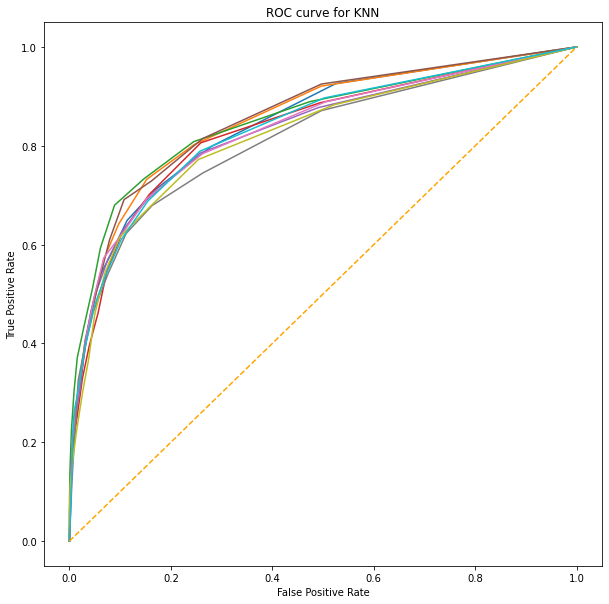

In [ ]:
# KNN ROC Curve:
#---------------------------------
fig = plt.figure(figsize=(10,10))
for i in range(k):
    plt.title('ROC curve for KNN')
    plt.plot(fpr_knn_metrix[i],tpr_knn_metrix[i])
    plt.ylabel('True Positive Rate')
    plt.xlabel('False Positive Rate')

plt.plot([0,1], [0,1], color='orange', linestyle='--')

<font color="Blue"> **Random Forest**

In [ ]:

from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import KFold
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV

k= 10
kf = KFold(n_splits= k, shuffle= True,random_state=42)

param_grid = { 
    'n_estimators': [1,10,100,1000], #shoud be increase with 10 logarithm power 10,100,1000
    'max_features': ['auto', 'sqrt', 'log2'],
    'max_depth': [1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20], #find default threshold value
}

random = RandomizedSearchCV(RandomForestClassifier(), param_grid , scoring = 'accuracy', cv = kf, verbose = 2, n_jobs = 4)
random.fit(X_train_Val, y_train_val)
random.best_estimator_


In [20]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.datasets import make_classification
from sklearn import datasets
from sklearn.model_selection import KFold
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_curve 
from sklearn.metrics import accuracy_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
from sklearn.metrics import precision_score
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score

k= 10
kf = KFold(n_splits= k, shuffle= True, random_state=42)

train_acc_forest=[]
val_acc_forest=[]
precision_forest=[]
recall_forest=[]
f1_forest=[]
AOC_forest=[]
ROC_forest_metrix=[]
fpr_forest_metrix=[]
tpr_forest_metrix=[]

forestModel = RandomForestClassifier(max_depth=19, max_features='sqrt', n_estimators=100) #max_depth=9, max_features='sqrt' 
for train_index , val_index in kf.split(X_train_Val):

    X_train, X_val= X_train_Val.iloc[train_index], X_train_Val.iloc[val_index]
    y_train , y_val = y_train_val.iloc[train_index] , y_train_val.iloc[val_index]
    forestModel.fit(X_train,y_train)

    # Training accuracy
    forest_train_pred_values=forestModel.predict(X_train)
    train_acc_frst= accuracy_score(y_train,forest_train_pred_values)
    train_acc_forest.append(train_acc_frst)

    # Validation accuracy
    forest_val_pred_values = forestModel.predict(X_val)
    val_accuracy_of_forest = accuracy_score(y_val,forest_val_pred_values)
    val_acc_forest.append(val_accuracy_of_forest)

    # Precision
    precision_forest.append (precision_score(y_val,forest_val_pred_values))

    # Recall
    recall_forest.append(recall_score(y_val,forest_val_pred_values))

    # F1 Score
    f1_forest.append(f1_score(y_val,forest_val_pred_values))

    # AOC Score
    AOC_forest.append(roc_auc_score(y_val,forest_val_pred_values))

    # ROC
    forest_roc_y_score= forestModel.predict_proba(X_val)[:,1]
    fpr_forest, tpr_forest, threshold4= roc_curve(y_val,forest_roc_y_score)
    fpr_forest_metrix.append(fpr_forest)
    tpr_forest_metrix.append(tpr_forest)


In [21]:
# Evaluation of Random Forest

print("Evaluation of Random Forest--------------------------")
avg_train_acc_forest= sum(train_acc_forest)/k
print("Train accuracy of Random Forest: ", avg_train_acc_forest)

avg_val_acc_score_of_forest = sum(val_acc_forest)/k
print("Test accuracy of Random Forest: ",avg_val_acc_score_of_forest)

avg_precision_forest= sum(precision_forest)/k
print("Precision Score: ",avg_precision_forest)

avg_recall_forest= sum(recall_forest)/k
print("recall Score:", avg_recall_forest)

avg_f1_forest= sum(f1_forest)/k
print("f1 Score: ", avg_f1_forest)

avg_aoc_forest= sum(AOC_forest)/k
print("AOC score: ",avg_aoc_forest)

Evaluation of Random Forest--------------------------
Train accuracy of Random Forest:  0.9988211064346816
Test accuracy of Random Forest:  0.8644015688287595
Precision Score:  0.8553061291731602
recall Score: 0.8801551609923213
f1 Score:  0.8674530379478907
AOC score:  0.864059406032942


In [ ]:
#potting training vs validation curve

import matplotlib.pyplot as plt

labels=[1,2,3,4,5,6,7,8,9,10]

fig = plt.figure(figsize=(10,5))
plt.plot(labels, train_acc_forest)
plt.plot(labels, val_acc_forest)
plt.legend(["training accuracy", "Validation accuracy"])
plt.plot()

In [ ]:
# Random Forest ROC Curve:
#---------------------------------
fig = plt.figure(figsize=(10,10))
for i in range(k):
    plt.title('ROC curve for Random Forest')
    plt.plot(fpr_forest_metrix[i],tpr_forest_metrix[i])
    plt.ylabel('True Positive Rate')
    plt.xlabel('False Positive Rate')

plt.plot([0,1], [0,1], color='orange', linestyle='--')

#### Generate CSV file

In [ ]:
"""
# model.predict(X_test) gives you an array of the prediction result
pred = model.predict(X_test)
# convert it to dataframe 
pred = pd.DataFrame(pred,columns=[label])
# take id column from test_data(given test.csv) and concat with pred
sub = pd.concat([test_data.id, pred], axis=1)
# Set id as index 
sub.set_index('id',inplace=True)
# Make csv of above dataframe sub
sub.to_csv(f"Submission_DataVerse_4t57tr.csv")
# In the kaggle notebook top right corner, you will get this csv in output directory.
"""

In [22]:
#upload the test data
from google.colab import files
uploaded = files.upload()

Saving testclean.csv to testclean.csv


In [23]:
import io
df_test = pd.read_csv(io.BytesIO(uploaded['testclean.csv']))

In [24]:

i = df_test['id']
df_test.drop('id', inplace=True, axis=1)
# model.predict(X_test) gives you an array of the prediction result
pred = logissticModel.predict(df_test)
# convert it to dataframe 
pred = pd.DataFrame(pred,columns=['label'])
# take id column from test_data(given test.csv) and concat with pred
sub = pd.concat([i, pred], axis=1)
# Set id as index 
sub.set_index('id',inplace=True)
# Make csv of above dataframe sub
sub.to_csv(f"Submission_DataVerse_4t57tr_knn.csv")
# In the kaggle notebook top right corner, you will get this csv in ou